# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
# Rename all the columns to lower case
df.columns = df.columns.str.strip().str.lower()


In [6]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

Change the index to `'linename'`: 

In [12]:
# Change the index to 'linename'
df = df.index('LINENAME')
df.index('LINENAME', inplace=True)


TypeError: 'RangeIndex' object is not callable

Reset the index: 

In [13]:
# Reset the index
df = df.reset_index()

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [14]:
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].str.len()

Write a function to clean column names: 

In [15]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division',
       'date', 'time', 'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

In [18]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip().lower().replace(" ", "_")
    return cleaned



In [19]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]


In [20]:
# Check to ensure the column names were cleaned
df.columns

Index(['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division',
       'date', 'time', 'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [21]:
import pandas as pd

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Add 'day_of_week' column
df['day_of_week'] = df['date'].dt.day_name()


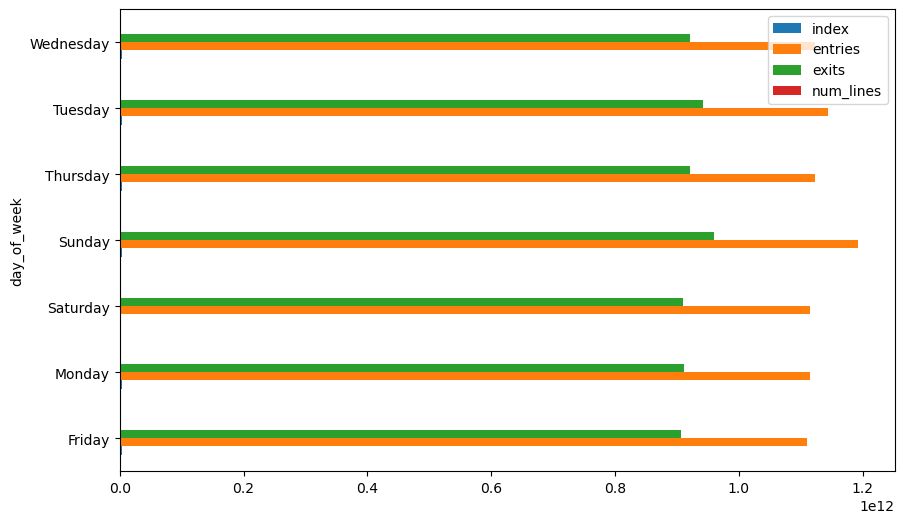

In [22]:
# Group the data by day of week and plot the sum of the numeric columns
import matplotlib.pyplot as plt
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh', figsize=(10, 6))
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [23]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
print(grouped.head())

  day_of_week       index        entries         exits  num_lines
0      Friday  2778112001  1110224700078  906799065337      75573
1      Monday  2783610827  1114237052454  911938153513      76110
2    Saturday  2741377942  1115661545514  909142081474      74725
3      Sunday  2792287000  1192306179082  959223750461      75306
4    Thursday  2817391725  1122723988662  920691927110      76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [24]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
print(grouped.head())

  day_of_week       index        entries         exits  num_lines is_weekend
0      Friday  2778112001  1110224700078  906799065337      75573        NaN
1      Monday  2783610827  1114237052454  911938153513      76110        NaN
2    Saturday  2741377942  1115661545514  909142081474      74725        NaN
3      Sunday  2792287000  1192306179082  959223750461      75306        NaN
4    Thursday  2817391725  1122723988662  920691927110      76607        NaN


In [28]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only=True)
wkend[['entries', 'exits']].plot(kind='barh', figsize=(10, 6))
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

Remove the `'c/a'` and `'scp'` columns. 

In [29]:
# Remove the 'c/a' and 'scp' columns
df =  df.drop(columns=['c/a', 'scp'])
print(df.head(2))

   index  unit station linename division       date      time     desc  \
0      0  R051   59 ST  NQR456W      BMT 2018-08-25  00:00:00  REGULAR   
1      1  R051   59 ST  NQR456W      BMT 2018-08-25  04:00:00  REGULAR   

   entries    exits  num_lines day_of_week  
0  6736067  2283184          7    Saturday  
1  6736087  2283188          7    Saturday  


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

# Your answer here 
The issue with the "day of week" and "weekend/weekday" charts is likely due to the way the days of the week are represented in the grouped['day_of_week'] column.

## Summary

You practiced your data cleanup skills using Pandas.